# Chapter 6: 統計モデリング視点から確率分布の紹介

以下の表形式で、基本的な確率分布を紹介。統計モデリングにおいて、関数や階層モデルを用いて、これらの確率分布を組み合わせていくことになる。

| 確率質量関数または確率密度関数 | $p(y\|\theta)$の具体的な関数形                     |
| ------------------------------ | :------------------------------------------------- |
| 図                             | 関数形を図示したもの                               |
| 確率変数の値                   | y:yのとりうる値                                    |
| パラメータ                     | 0:0のとりうる値                                    |
| 平均                           | $p(y\|\theta)$の平均の理論値                       |
| 標準偏差(または分散共分散)     | $p(y\|\theta)$の標準偏差(または分散共分散)の理論値 |
| 登場する箇所                   | 本書において登場する箇所                           |

数学的には標準偏差より分散が取り扱いやすいが、Stanでの取り扱い、平均との単位の整合性から基本的には標準偏差を記載する。

$p(y|\theta)$の関数系では、正規化のため$\Gamma(x)$当関数がしばしば見られる。定義は以下となる。

$$
\Gamma(x) = \int_{0}^{\infty} t^{x-1}\exp^{-t}dt
$$



## 6.1 一様分布

| 確率質量関数 | $\text{ Uniform } (y \mid a,b)= \begin{cases}\dfrac{1}{b-a} & a \leq x \leq bの場合 \\ 0 & それ以外の場合 \end{cases}$ |
| ------------ | :--------------------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-1.png) <br> 図 6.1 $a=-2, b=10の一様分布$                                               |
| 確率変数の値 | $y:[a, b]の範囲の実数$                                                                                                 |
| パラメータ   | $a, b : \text{実数. ただし, a < b}$                                                                                    |
| 平均         | $(a+b) / 2$                                                                                                            |
| 標準偏差     | $(b-a) / \sqrt{12}$                                                                                                    |
| 登場する箇所 | $多数$                                                                                                                 |

- 使用例
  
  無情報事前分布として使われる。Stanではパラメータの事前分布はデフォルトでこれ。


## 6.2 ベルヌーイ分布

| 確率質量関数 | $\text{ Bernoulli } (y \mid \theta)= \begin{cases}\theta & y=1の場合 \\ 1-\theta & y=0の場合 \end{cases}$ |
| ------------ | :-------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-2.png) <br> 図 6.2 $\theta=0.2のベルヌーイ分布$                            |
| 確率変数の値 | $y:0か1のいずれかの整数値$                                                                                |
| パラメータ   | $\theta : [0, 1]の範囲の実数$                                                                             |
| 平均         | $\theta$                                                                                                  |
| 標準偏差     | $\sqrt{\theta(1-\theta)}$                                                                                 |
| 登場する箇所 | $5.3節, 8.4節, 11.1.2項, 11.3節$                                                                          |

スイスの数学者Jakob Bernoulliにちなむ。

この分布は1が出る確率が$\theta$で、0が出る確率は$1-\theta$と解釈できる。
- データ例
  
  コイン投げで表が出るかどうかなど結果が二値で表現できる場合に使われる。

- 使用例
  
  5.3節で扱ったようにパラメータ$\theta$は[0, 1]の範囲なのでロジスティック関数(inv_logit)と組み合わせて使うことが多い。



## 6.3 二項分布

| 確率質量関数 | $\text{ Binominal } (y \mid N, \theta)= \dfrac{N!}{y!(N - y)!} \theta^y (1 - \theta)^{N-y}$ |
| ------------ | :------------------------------------------------------------------------------------------ |
| 図           | ![Alt text](chap06/output/fig6-3.png) 図 6.3 $N = 10, \ \theta = 0.2 の二項分布$            |
| 確率変数の値 | $y:0, 1, ..., N のいずれかの整数値$                                                         |
| パラメータ   | $N:正の整数 \\ \theta : [0, 1]の範囲の実数$                                                 |
| 平均         | $N \theta$                                                                                  |
| 標準偏差     | $\sqrt{N \theta(1-\theta)}$                                                                 |
| 登場する箇所 | $5.2節, 11.1.2項, 11.1.3項$                                                                 |

パラメータ$\theta$のベルヌーイ分布に従うコイン投げをN回行った結果、表がy回出る確率を表していると解釈できる。このように二項分布の裏にはベルヌーイ分布がある。N=1のときはベルヌーイ分布に一致。

二項分布は再生性をもつ。再生性とは、確率変数が互いに独立でそれぞれが同じ確率分布に従う場合、その確率変数の和が同じ確率分布に従う性質。確率変数$y_1, y_2$が独立で、それぞれ異なる$N_1, N_2$であり、$\theta$は同じとき以下が言える。

$$
\begin{align}
&y_1 \sim Binominal(N_1, \theta) \ かつ \ y_2 \sim Binominal(N_2, \theta) のとき \nonumber\\
&y = y_1 + y_2 \sim Binominal(N_1 + N_2, \theta) \ が成り立つ \nonumber\\
&\nonumber
\end{align}
$$

Nが十分大きく、分布が左右対称に近い場合は正規分布(平均$N \theta$, 標準偏差$\sqrt{N \theta (1 - \theta)}$)で近似できる。確率的プログラミング言語では一般的に正規分布の計算のほうが速い。

- データ例
  
  10試合中で買った回数。兄弟姉妹のうち女性の人数。

- 使用例
  
  5.2節参照。ベルヌーイ分布同様ロジスティック関数を使って$\theta$を表す場合が多い。Nは既知のケースが多いだろう。



## 6.4 ベータ分布

| 確率質量関数 | $\text{ Beta } (\theta \mid \alpha, \beta)= \dfrac{1}{B(\alpha, \beta)} \theta^{\alpha - 1}(1 - \theta)^{\beta - 1}$ |
| ------------ | :------------------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-4.png) <br> 図 6.4 $ベータ分布$                                                       |
| 確率変数の値 | $\theta : (0, 1)の範囲の実数$                                                                                        |
| パラメータ   | $\alpha, \beta : 正の実数$                                                                                           |
| 平均         | $\alpha / (\alpha + \beta)$                                                                                          |
| 標準偏差     | $\dfrac{\sqrt{\alpha \beta}}{(\alpha + \beta)\sqrt{\alpha + \beta + 1}}$                                             |
| 登場する箇所 | $10.2.3項$                                                                                                           |

$B(\alpha, \beta)$は積分を1にするための正規化定数であり定義は以下である。
$$
B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

この分布は定義域が(0,1)の連続型分布なので確率を生成する分布とも解釈できる。例えば、1が出た回数$\alpha$, 0が出た回数$\beta$という試行において、1が出る確率$\theta$の確率分布を推定する場合に使用できる。もちろん、確率でなくても(0,1)と考えられる変数なら何でも使うことができる。例えば、2点間の内分点を算出する際の重みを生成する分布として使うことができる。

この確率分布を用いて、1の出る確率pの最頻値や、pが任意の範囲に収まっている確率の導出などの分析が可能。

平均が$\alpha / (\alpha + \beta)$であることからもわかるが、$\alpha$を小さくすると平均が0に近づき、$\beta$を小さくすると平均が1に近づく。

- データ例
  
  品目がN種類ある製品があり、それぞれの品目の故障率(故障確率)の分布を考えたい場合。

- 使用例
  
  ベルヌーイ分布もしくは二項分布のパラメータ$\theta$を生成するのに使われることが多い。上記データ例では、各品目の生産量$M[n]$に対し、故障個数$Y[n]$の場合に故障確率$\theta[n]を得る事ができる。平均を使っても良いが、サンプル数が小さい場合に推定が難しい。そこで品目それぞれの故障確率は一つのベータ関数から生成されたと考える。

  このときのモデル式は以下となる。
  ##### モデル式 6-1
  $$
  \begin{align}
  &\theta[n] \sim Beta(\alpha, \beta) &n = 1…...N \nonumber \\
  &Y[n] \sim Binomial(M[n], \theta(n]) &n = 1…...N\nonumber
  \end{align}
  $$

  $\theta[n]$だけでなく$\alpha, \beta$もデータから推定する。データが少ない場合や背景知識がある場合には、$\alpha, \beta$の事前分布に弱情報事前分布を設定することもある。
  
  ベータ分布は$\alpha$と$\beta$の値の組み合わせで柔軟に形状が変わる。
  - $\alpha = \beta = 1$の場合: 標準一様分布になる。平均値 = 最頻値になる。
  - $\alpha = \beta \gt 1$の場合: 正規分布になる。平均値 = 最頻値になる。
  - $\alpha \gt \beta$の場合: 左肩下がりのグラフになる。最頻値が平均値より右側になる。
  - $\alpha \lt \beta$の場合: 右肩下がりのグラフになる。平均値が最頻値より右側になる。

  ということでベイズ統計においては、この柔軟さを活かして変数の事前確率分布に用いられることが多い。


## 6.5 カテゴリカル分布

| 確率質量関数 | $\text{ Categorical } (y = k \mid \vec{\theta}) = \theta_k$                                                                 |
| ------------ | :-------------------------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-5.png) <br> 図 6.5 $K = 5, \ \vec{\theta}  = (0.1, 0.2, 0.25, 0.35, 0.1) のカテゴリカル分布$ |
| 確率変数の値 | $y : 1, 2, ..., Kのいずれかの整数 (0は含まない)$                                                                            |
| パラメータ   | $K : 2以上の正の整数 \\ \theta : \text{長さKのベクトル. 各要素は[0, 1]の範囲の実数で合計すると1となる}$                     |
| 平均         | $I[y = k]$ の平均[<sup>1)</sup>](#fn1) $: \theta_k$                                                                                          |
| 分散共分散   | $I[y = k]の分散 : \theta_k(1 - \theta_k) \\ I[y = k]とI[y = k']の共分散(k \neq k'): -\theta_k \theta_{k'}$                  |
| 登場する箇所 | $9.4.2項, 10.1.4項, 11.4節$                                                                                                 |

>[<sup id="fn1">1)</sup>](#fn1-back) $\text{I[y=k]はy=kとなる場合に1を返し, それ以外の場合は0を返す関数である.}$

この分布はカテゴリー変数のインデックスを確率的に生成する事ができると解釈できる。各パラメータの説明をすると、あるカテゴリー変数において、カテゴリーの種類がK個、各カテゴリーの出やすさ(生起確率)が$\vec{\theta}$(の各要素)になっている。サイコロを例にとると、kの目が出る確率が$\theta_k$であるようなK面サイコロでであるといえる。

- データ例
  
  購入した商品のカテゴリーをインデックスとして扱うデータの場合。

- 使用例
  
  ベルヌーイ分布のように説明変数とあわせて使う。

    - $Y (1 \sim Kの整数):$ 購入商品のカテゴリー
    - $Y[n] (n=1, ..., N):$ 購入者のデータ
    - $\overrightarrow{\theta[n]}:$購入者毎に各カテゴリーを選ぶ確率
    - $Y[n]$は$\overrightarrow{\theta[n]}$をパラメータとするカテゴリカル分布から確率的に生成
    - $\overrightarrow{\theta[1]}, \ldots, \overrightarrow{\theta[N]}$はそれぞれが長さKのベクトルで、各ベクトル$\overrightarrow{\theta[n]}$において要素の和は1である
    - 説明変数は$\text{年齢}Age[n], \text{性別}Sex[n], \text{年収}Income[n]$
  
  とすると、説明変数を線形結合して以下のモデル式が考えられる。

  ##### モデル式 6-2
  $$
  \begin{align}
  &\overrightarrow{\mu[n]} = \overrightarrow{b_1} + \overrightarrow{b_2}Age[n] + \overrightarrow{b_3}Sex[n] + \overrightarrow{b_4}Income[n] & n = 1, ..., N \nonumber \\
  &\overrightarrow{\theta[n]} = \text{softmax } (\overrightarrow{\mu[n]}) & n = 1, ..., N \nonumber \\
  &Y[n] \sim \text{Categorical } (\overrightarrow{\theta[n]}) & n = 1, ..., N \nonumber
  \end{align}
  $$

ここで、説明変数の線形結合である$\vec{\mu}$は長さKのベクトルであり、各カテゴリーの選ばれる「強さ」と言える量である。説明変数の影響はカテゴリーごとに異なるので、回帰係数$\vec{b_1} \sim \vec{b_4}$はそれぞれ長さKのベクトルとなる。データからこれらの回帰係数を推定する、このようなモデルを多項ロジスティック回帰(multinomial logistic regression) と呼び、10.1.4項で扱う。

ここでsoftmaxは以下の関数である。

$$
\vec{\theta} = \text{softmax } \left( \frac{\exp(x_1)}{\sum_{k'=1}^K \exp(x_{k'})} \cdots \frac{\exp(x_K)}{\sum_{k'=1}^K \exp(x_{k'})} \right)^T
$$

この関数は$(-\infty, \infty)$をとるこの各要素を、$\exp$で正の値にしてから合計が1になるように規格化している。つまり、この関数は各要素が$(-\infty, \infty)$の範囲をとる長さKのベクトル$\vec{x}$を、各要素が$(0, 1)$の範囲をとり合計1になる長さK
のベクトル$\vec{\theta}$(K-simplex またはK-単体と呼ぶ)に変換する関数の一つである。

このようにカテゴリカル分布と softmaxは組み合わせて使うことが多い。


## 6.6 多項分布

| 確率質量関数 | $\text{ Multinomial } (\vec{y} \mid N, \vec{\theta}) = \dfrac{N!}{\prod^K_{k=1} y_k!}\displaystyle{\prod^k_{k=1}} \theta^{y_k}_k$ |
| ------------ | :-------------------------------------------------------------------------------------------------------------------------------- |
| 図           | 略                                                                                                                                |
| 確率変数の値 | $\vec{y} : \text{長さKのベクトル. 各要素は0, 1, ..., N のいずれかの整数で合計するとNになる}$                                      |
| パラメータ   | $K : 2以上の正の整数 \\ N : 正の整数 \\ \vec{\theta} : 長さKのベクトル. 各要素は [0,1]の範囲の実数で合計すると1となる $           |
| 平均         | $y_kの平均: N \theta_k$                                                                                                           |
| 分散共分散   | $y_kの分散 : N \theta_k(1 - \theta) \\ y_kとy_{k'}の共分散(k \neq k' : -N \theta_k \theta_{k'})$                                  |
| 登場する箇所 | $9.4.2項$                                                                                                                         |

この分布は$\vec{y}$の各要素である$y_1, \ldots, y_k$が従う同時分布になっている。パラメータ$\vec{\theta}$のカテゴリカル分布に従うサイコロ投げをN回行い、各目が$y_1, \ldots, y_k$回出る確率を表していると解釈できる。$N=1$のとき、

- 多項分布: 各カテゴリーのカウント回数(0か1) を要素に持つベクトルを返す($\vec{y} = [y_1, \ldots, y_k]のうちy_2=1、ほかは0$)。
- カテゴリカル分布: カテゴリーのインデックス(例えば2)を一つ返す。

という違いがあることに注意。
イメージとしては[ベルヌーイ分布](#62-ベルヌーイ分布)と[二項分布](#63-二項分布)の関係を多変量版にしたもの。ただし、カテゴリー数が2個の時、

- 多項分布では$y_1$と$y_2$というニつのカテゴリーのカウント回数を生成
- 二項分布ではN回のうち事象(例えば1)が起きた回数だけをカウントした数である$y$の値を一つ生成する。

また、カテゴリーがK個の多項分布の作図はK次元の図となってしまうので図は省略する。

- データ例
  
  宝くじを1000枚買って、各カテゴリー(年末ジャンボなら1等～7等とハズレ)が何回ずつ出たか。

- 使用例
  
  カテゴリカル分布と同様で、説明変数を使う場合は$\text{softmax}$を使って$\vec{\theta}$を表すことが多い。Nは与えられている場合が多いだろう。



## 6.7 ディリクレ分布

| 確率質量関数 | $\text{ Dirichlet } (\vec{\theta} \mid \vec{\alpha}) = \dfrac{1}{B(\vec{\alpha})} \displaystyle{\prod^K_{k=1}\theta_k^{a_k-1}}$                                                                                                                                                                                                                          |
| ------------ | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| 図           | ![Alt text](chap06/output/fig6-6.png) <br> 図 6.6 $k=3のディリクレ分布. \\ 乱数として\vec{\theta} = (\theta_1 \theta_2 \theta_3)^Tを200個生成してプロットした. \\ パラメータ\vec{\alpha}は \\ (左上)(1, 1 ,1)^T, \\ (左下)(0.3, 0.3, 0.3)^T \\ (右上)(0.3, 1, 1)^T  \\ (右下)(3, 6, 6)^T \\ である.\\ 例えば右下の場合の平均は(0.2, 0.4, 0.4)^Tである.$ |
| 確率変数の値 | $\vec{\theta} :長さKのベクトル.各要素は(0, 1)の範囲の実数で合計すると1になる$                                                                                                                                                                                                                                                                           |
| パラメータ   | $K : 2以上の正の整数 \\  \vec{\alpha} : 各要素は正の実数$                                                                                                                                                                                                                                                                                               |
| 平均         | $\sum^K_{k=1} \alpha_k = \alpha_{sum}と表すとすると, \\ \theta_kの平均 : \alpha_k / \alpha_{sum}$                                                                                                                                                                                                                                                       |
| 分散共分散   | $\theta_kの分散 : \alpha_k (\alpha_{sum} - \alpha_k) / (\alpha_{sum}^2(\alpha_{sum} + 1)) \\ \theta_kと\theta_{k'}の共分散(k \neq k') : -\alpha_k\alpha_{k'} / (\alpha^2_{sum}(\alpha_{sum}+1))$                                                                                                                                                        |
| 登場する箇所 | $10.2.3項, 11.4節$                                                                                                                                                                                                                                                                                                                                      |

あるK個の事象についてk番目の事象が$\alpha_k−1$回発生した場合に、その事象の生起確率が$\theta_k$である確率。

この分布は$\vec{\theta}$の各要素である$\theta_1, \ldots, \vec{\theta}_K$が従う同時分布になっている。$\text{B}(\alpha)$は積分を1にするための正規化定数であり、定義は以下である。

$$
\text{B}(\alpha) = \frac{\prod_{k=1}^K \Gamma(\alpha_k)}{\displaystyle \Gamma \left( \sum_{k=1}^K \alpha_k \right)}
$$

この分布は「合計すると1になる確率のベクトル$\vec{\theta}$」を生成する分布と解釈できる。イメージとしてはベータ分布の多変量版で、カテゴリー数$K=2$のときベータ分布の確率密度関数に一致するが、以下の違いがあることに注意。

- ディリクレ分布: $\theta_1$,と$\theta_2$の二つの値を生成
- ベータ分布は$\theta$の値を一つ生成

ベータ分布の場合と同様に確率を生成するだけではなく、例えば3点間以上の内分点を算出する際の重みを生成する分布としても使える。

また、カテゴリーがK個のディリクレ分布について，$\vec{\theta}$のそれぞれの要素の値をK個の軸とするとK次元の図となり簡単には作図できない。しかし、$\vec{\theta}$の各要素の合計が1である条件から次元数を1次元落とすことができる。図6.6では$K=3$の場合について、1次元落として表現した2次元の確率密度関数から乱数を生成してプロットした。

- データ例
  
  例えば多面のサイコロの各面のでやすさなど、複数カテゴリーの各カテゴリー選択確率の分布を考える場合。

- 使用例
  
  典型的にはカテゴリカル分布もしくは多項分布のパラメータ$\vec{\theta}$を生成するのに使う。例えば、以下のように使う。

  ##### モデル式 6-3
  $$
  \begin{align}
  &\vec{\theta} \sim \text{Dirichlet } (\vec{\alpha}) \nonumber \\
  &Y \sim \text{Categorical } (\vec{\theta}) \nonumber
  \end{align}
  $$
  
  $\vec{\theta}$がディリクレ分布によってデータから推定したい数値として、$\vec{\alpha}$は経験的に固定値を与えるか、データから推定して当てはめる。例えば6面サイコロの試行結果から各面が何回出たかのデータを採って使う、など。他には11.4節のLatent Dirichlet Allocationで使う。
  
  ディリクレ分布はカテゴリーK個の1~Kの数値の乱数生成機の内部パラメータ(どの値がどのくらい出やすいか)を決める分布とも言える。パラメータ$\vec{\alpha}$の各要素 $\alpha_1, \ldots, \alpha_K$は以下のような影響を与える。
  
  - $\alpha_1 = \alpha_2 = \ldots = \alpha_K \gt 1$の場合: 生成される数値に偏りがない。
  - $\alpha_1, \ldots, \alpha_K$ がともに$\lt1$: 一部の数値が出やすく、その他は出にくい。
  - $\alpha_1 = \alpha_2 = \ldots = \alpha_K = 1$ の場合: $\prod^K_{k=1}\theta_k^{a_k-1} = 1$ となり、定数$\frac{1}{B(\vec{\alpha})}$のみ残るため、K次元で合計が1になる空間における一様分布に相当するものになり、どんな偏りの乱数生成機になるか無情報の状態になる。


## 6.8 指数分布

| 確率質量関数 | $\text{Exponential} (y \mid \beta) = \beta \exp(-\beta y)$    |
| ------------ | :------------------------------------------------------------ |
| 図           | ![Alt text](chap06/output/fig6-7.png) <br> 図 6.7 $ 指数分布$ |
| 確率変数の値 | $y : y \geq 0の実数$                                          |
| パラメータ   | $\beta : \text{正の実数. rateパラメータと呼ばれる}$           |
| 平均         | $1 / \beta$                                                   |
| 標準偏差     | $1 / \beta$                                                   |
| 登場する箇所 | $10.2.2項$                                                    |

無記憶性(memorylessness)を持つ唯一の連続型確率分布。無記憶性とは確率Pr、確率分布(ここでは指数分布に従う)yと任意の$s, t$について以下が成り立つこと。

$$
Pr(y \gt s + t|y \gt s) = Pr(y \gt t)
$$

例えば、ワイングラスの使用時間とその時点で壊れる/壊れない確率が指数分布に従う場合に、3年で壊れた$(s=3)$あと、次の1年$(t=1)$で壊れない確率は、最初から1年間で壊れない確率と変わらないといえる。これを上の無記憶性の式に$s=3, s=1$として当てはめると以下になる。

$$
Pr(y \gt 3 + 1|y \gt 3) = Pr(y \gt 1)
$$

式を読み解くと、

- 左辺: 3年経過時に壊れたという条件で、次の1年で壊れる確率
- 右辺: 事前条件なしで次の1年で壊れる確率

が等しいため、事前条件(3年間使って壊れなかったこと)はその後の確率(次の1年に壊れる確率)に影響しないということを表している。

指数分布と正規分布の$\exp$の中身($y$の関数の部分)を比較すると、$-\beta y$と$-\dfrac{1}{2} \left(\dfrac{y - \mu}{\sigma} \right)^2$で、もっとざっくり比較すると、$-y$乗と、$-y^2$乗であるため、正規分布に比べて確率密度が小さくなるスピードがかなり遅く、裾が長い分布と言える。また、平均=標準偏差=$1/\beta$なので$\beta$が小さくなると平均と標準偏差はともに大きくなる。

- データ例
  
  あるイベントが起こるまでの時間(故障するまでの時間、死ぬまでの時間、流れ星を観測するまでの時間など)。

- 使用例
  
  上記のデータのほか、ガンマ分布のパラメータなど、正の実数を持つパラメータを生成する分布として使うことがある(10.2.2項参照)



## 6.9 ポアソン分布

| 確率質量関数 | $\text{Poisson} (y \mid \lambda) = \dfrac{1}{y!} \lambda^y \exp(-\lambda)$      |
| ------------ | :------------------------------------------------------------------------------ |
| 図           | ![Alt text](chap06/output/fig6-8.png) <br> 図 6.8 $\lambda = 2.5のポアソン分布$ |
| 確率変数の値 | $y : 0, 1, 2, ...のいずれかの整数値$                                            |
| パラメータ   | $\lambda : 正の実数$                                                            |
| 平均         | $\lambda$                                                                       |
| 標準偏差     | $\sqrt{\lambda}$                                                                |
| 登場する箇所 | $5.4節, 11.1.2項, 11.1.3項, 11.3節, 11.2.6節$                                   |

単位時間あたり平均$\lambda$回起こる事象(平均$1/\lambda$の指数分布に従う)がちょうど$y$回起こる確率を表す。

「パラメータ=平均」となっているので「パラメータ$\lambda$のポアソン分布」や「平均$\lambda$のポアソン分布」という言い方をする。

ポアソン分布は再生性を持つ。なので、単位時間の5倍の期間中に起きるイベントの数は平均$5 \lambda$のポアソン分布に従う。

また、二項分布 $\text{Binomial } (y|N, \theta)$において$N$が大きくて$\theta$が小さい場合はポアソン分布で近似できる。これはポアソン分布はポアソンの極限定理から下記で導出されることからもわかる。

$$
\lim_{\lambda=N\theta, N\rightarrow \infty} {}_NC_y \theta^y (1-\theta)^{N-y} = \frac{\lambda^y e^{-\lambda}}{y!}
$$

この式は二項分布における$N \rightarrow \infty$で、$\theta \rightarrow 0$の極限である。

例えば、交通事故死亡者数はポアソン分布に従うと考えられているが、毎日多くの人が事故にあって死亡する可能性があるが(Nが大きくて)、実際に事故に遭遇して死亡する確率は非常に低い($\theta$が小さい)からだと考えることができる。

$y$の値が大きくなると分数の分母$y!$が分子$\lambda^y$よりずっと速く大きくなるので裾が短い分布である。

$\lambda$が十分大きい場合、平均$\lambda$・標準偏差$\sqrt{\lambda}$の正規分布に近似できる。

その他、確率変数$y_1$と$y_2$が独立で$y_1 \sim \text{Poisson } (\lambda_1)$ かつ $y_2 \sim \text{Poisson } (\lambda_2)$で、合計$y_1 + y_2 = N$が与えられている時、以下が成り立つ。

$$
y_1 \sim \text{Binomial } (N, \frac{\lambda_1}{\lambda_1 + \lambda_2})
$$

さらに一般的に，確率変数 $y_1, \ldots, y_k$ が互いに独立で $y_k \sim \text{Poisson } (\lambda_k) \ (k = 1, \ldots, K)$で、合計$y_1 + \ldots + y_k = N$が与えられている時、以下が成り立つ。

$$
\vec{y} \sim \text{Multinomial } \left(N, \left( \frac{\lambda_1}{\sum_{k=1}^K \lambda_k} \cdots \frac{\lambda_K}{\sum_{k=1}^K \lambda_k} \right)^T \right)
$$

- データ例
  
  1日の間に観測される動物の個体数、1時間の間に届くメールの数、これらは背後に指数分布に従うイベントが考えられる。
  
  マンボウが卵を産んで、そのうち成魚になる数。これは背後に二項分布があって、$N$が大きくても$\theta$が小さいと考えられる。

- 使用例
  
  5.4節で扱ったように、パラメータ$\lambda$は正の実数なので、指数関数$(\exp)$と組み合わせて使うことが多い。


## 6.10 ガンマ分布

| 確率質量関数 | $\text{Gamma} (y \mid \alpha, \beta) = \dfrac{\beta^{\alpha}}{\Gamma(\alpha)} y^{\alpha - 1} \exp(-\beta y)$ |
| ------------ | :----------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-9.png) <br> 図 6.9 $ガンマ分布$                                               |
| 確率変数の値 | $y : 正の実数$                                                                                               |
| パラメータ   | $\alpha, \beta : \text{正の実数. αはshapeパラメータ(形状母数), βはrateパラメータ(尺度母数)と呼ばれる}$                           |
| 平均         | $\alpha / \beta$                                                                                             |
| 標準偏差     | $\sqrt{\alpha} / \beta$                                                                                      |
| 登場する箇所 | $10.2.2項, 11.2節$                                                                                           |

ガンマ分布は、平均$1/\beta$の時間で1回起きるイベントが、実際に起きるまでの時間の分布。$\frac{\beta^{\alpha}}{\Gamma(\alpha)}$の部分は正規化定数。

ガンマ分布は再生性を持つ。つまり次の式が成り立つ。$y = y_1 + y_2 \sim \text{Gamma }(\alpha_1 + \alpha_2, \beta)$。$\beta$が異なる場合は再生性はない。

ガンマ分布はスケーリングの性質を持つ。つまり任意の正の実数cをyにかけたとき、次が成り立つ。$cy \sim \text{Gamma }(\alpha, \beta / c)$

ガンマ分布は指数関数と密接に関係する。互いに独立な、単位時間に平均$1/\beta$発生する指数分布に従うイベントが起きるまでの時間について、$\alpha$を整数として、$\alpha$個の時間$T_1 + \ldots + T_\alpha$を考える。これらの和を取った新しい確率変数は$y=T_1 + \ldots + T_\alpha \sim \text{Gamma } (\alpha, \beta)$となる。また以下のことが成り立つ。
- $y$の平均: $T_1 + \ldots + T_\alpha$の平均なので、指数関数の平均$1/\beta \times \alpha = \alpha/\beta$
- ガンマ分布は指数分布の一般化: $\alpha=1$のとき$\text{Gamma }(1, \beta) = \text{Exponential }(\beta)$

上記のスケーリングの性質と指数分布の関係から?$\alpha$か$\beta$の片方を固定値として与え、もう片方を推定することも多い。

ポワソン分布とも密接な関係があることを実例で示す。平均2年で壊れるワイングラス($\beta=0.5$)が3つあり、1つずつ使用する場合を考える。
- ワイングラスが3つとも壊れるまでの時間:$\text{Gamma }(3, 0.5)$
- 3つ壊れるまでの時間が5年を超える確率: $\text{Prob}[\text{Gamma }(3, 0.5)] \gt 5$

ここで、同じ事象をポワソン分布で表すことができる。グラスが3個壊れるのに5年以上かかる確率=5年以内に、2個しか壊れない確率、と言い換えることができるので以下の式となる。
- $\text{Prob}[\text{Poisson }(5 \times 0.5)] \lt 2$

$\exp(-\beta y)$の$\exp$の中身が$-y$乗なので、$-y^2$乗である正規分布に比べ確率密度が小さくなるスピードがかなり遅い、裾の長い分布。

$\alpha$十分大きい場合は正規分布に近似できる。十分近似できる場合は正規分布を使うと便利

またガンマ分布に従う2つの独立な確率変数$y_1, y_2$についてべーた分布への変換が可能。式は以下となる。
$$
\frac{y_1}{y_1 + y_2} \sim \text{Beta }(\alpha_1, \alpha_2)
$$

さらに、この式を$y_1, \ldots, y_K$について一般化するとディリクレ分布となる。
$$
\left(\frac{y_1}{\sum_{k=1}^K y_k} \cdots \frac{y_K}{\sum_{k=1}^K y_k} \right)^T \sim \text{Dirichet }(\vec{\alpha})
$$

- データ例
  
  待ち時間に使う。流れ星が5個流れるまでの時間。パソコンのメモリが壊れるまでの時間

- 使用例
  
  上記のデータの他、ベータ分布やガンマ分布のパラメータなど、正の実数を持つパラメータを生成する分布として使う事が多い。(10.2.2項参照)


## 6.11 正規分布

| 確率質量関数 | $\text{Normal} (y \mid \mu, \sigma) = \dfrac{1}{\sqrt{2\pi} \sigma} \exp\left(-\dfrac{1}{2} \left(\dfrac{y - \mu}{\sigma} \right)^2 \right)$ |
| ------------ | :------------------------------------------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-10.png) <br> 図 6.10 $正規分布$                                                                               |
| 確率変数の値 | $y : 実数$                                                                                                                                   |
| パラメータ   | $\mu : 実数 \\  \sigma : 正の実数$                                                                                                           |
| 平均         | $\mu$                                                                                                                                        |
| 標準偏差     | $\sigma$                                                                                                                                     |
| 登場する箇所 | $多数$                                                                                                                                       |

このテキストではNormal(平均, 標準偏差)もしくはN(平均, 標準偏差)と書く。

正規分布は再生性を持つ。つまり
$$
\begin{align}
&確率変数y_1, y_2が独立で、 \nonumber \\
&y_1 \sim \text{ Normal } (\mu_1, \sigma_1) \ かつ \ y_2 \sim \text{ Normal } (\mu_2, \sigma_2) のときに \nonumber \\
&y = y_1 + y_2 \sim \text{ Normal } \left( \mu_1 + \mu_2, \sqrt{\sigma_1^2 + \sigma_2^2 } \right) \nonumber
\end{align}
$$
が成り立つ[<sup>2)</sup>](#fn2)。

正規分布は世の中で遭遇するデータの多くにあてはめられる。メカニズムが明確ではないデータや、モデリングではデータでなくても、潜在変数、グループ差や個人差、時間による変動分が正規分布に従うと仮定する。

正規分布の特徴は分布の範囲が$(-\infty, \infty)$であることと、対称性があること。また、$\exp$の中がマイナス2乗なので、$\mu$から$\pm 2\sigma$ぐらい離れると確率密度が小さくなる裾の狭い分布。なので外れ値に推定結果が引きずられやすい。これを避けるために[コーシー分布](#614-コーシー分布)や[Studentのt分布](#615-studentのt分布)を代わりに使う。

また、正規分布の$y \geq 0$の部分だけ取り出して正規化したものを半正規分布(half-Normal distribution)と呼び、$\text{Normal}^+ (0, \sigma)$と書く。+は0以上の部分のみ定義されることを示す。

- データ例
  
  センター試験の国語の点数、パン屋さんの食パンの重さなど。

- 使用例
  

  上記のデータのほか、標準偏差など正の実数値をとるパラメータの弱情報事前分布として使うことがある。(10.2.2節参照)

>[<sup>2)</sup>](#fn2-back) 正規分布をN(平均, 分散)で表すと、$y_1 \sim \text{N} (\mu_1, \sigma_1^2)$ かつ $y_2 \sim \text{N} (\mu_2, \sigma_2^2)$の時、$y = y_1 + y_2 \sim \text{N} \left( \mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2 \right)$に従う。


## 6.12 対数正規分布

| 確率質量関数 | $\text{LogNormal} (y \mid \mu, \sigma) = \dfrac{1}{\sqrt{2\pi} \sigma} \dfrac{1}{y} \exp\left(-\dfrac{1}{2} \left(\dfrac{\log y - \mu}{\sigma} \right)^2 \right)$ |
| ------------ | :---------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-11.png) <br> 図 6.11 $正規分布$                                                                                                    |
| 確率変数の値 | $y : 正の実数$                                                                                                                                                    |
| パラメータ   | $\mu : 実数 \\  \sigma : 正の実数$                                                                                                                                |
| 平均         | $\exp (\mu + \sigma^2 / 2)$                                                                                                                                       |
| 標準偏差     | $\exp (\mu + \sigma^2 / 2 \sqrt{\displaystyle{e^{a^2}} })$                                                                                                        |
| 登場する箇所 | $10.2.2項, 11.4.4項$                                                                                                                                              |

対数正規分布の対数は、以下のように確率変数yの対数が正規分布に従うことに由来する
$$
\begin{align}
y &\sim \text{LogNormal}(\mu, \sigma) のとき、\nonumber \\
x = \log y &\sim \text{Normal }(\mu, \sigma) &\nonumber
\end{align}
$$

逆に言うと
$$
\begin{align}
x  &\sim Normal(\mu, \sigma)のとき、\nonumber \\
e^x &\sim \text{LogNormal}(\mu, \sigma) \nonumber
\end{align}
$$

正規分布に従う互いに独立な$x_1, x_2$の和は再生性を持つので、対数正規分布に従う$y_1, y_2$は積を用いて以下が成り立つ。
$$
\begin{align}
y_1 &\sim \text{LogNormal}(\mu_1, \sigma_1) \nonumber \\
y_2 &\sim \text{LogNormal}(\mu_2, \sigma_2) \nonumber \\
y=y_1 y_2 &\sim \text{LogNormal}(\mu_1 + \mu_2, \sqrt{\sigma_1 + \sigma_2}) \nonumber\\
\end{align}
$$

$\exp\left(-\frac{1}{2} \left(\frac{\log y - \mu}{\sigma} \right)^2 \right)$の$\exp$中身はざっくり$-(\log y)^2$なので正規分布の$-y^2$に比べるとyの増大に伴って確率密度が小さくなるスピードが遅く、裾が長い分布と言える。

分布の裾の長さの比較[<sup>4)</sup>](#fn4)
$$
コーシー分布 \gt 対数正規関数 \gt 指数分布, ガンマ分布 \gt 正規分布
$$

- データ例
  
  人間の体重、年収の金額など。低い方には限度があるが、高い方には限度がないような事象のモデル化に使われる。

- 使用例
  
  上記のデータの他、標準偏差など正の実数値を取るパラメータの弱情報事前分布として使うことがある。(10.2.2項参照)

>[<sup>4)</sup>](#fn4-back) 例えば、$\log$(指数分布の確率密度関数/対数正規分布の確率密度関数)という式を作って、$y \rightarrow \infty$の極限を取ることで裾の長さを比較できる。

ベイズ統計モデリングの内容からははずれるが、対数分布に従うデータの外れ値(異常値)を検出する際は、対数を取って正規分布に変換してから標準偏差や四分位を求めるのがやりやすい。



## 6.13 多変量正規分布

| 確率質量関数 | $\text{MultiNormal} (\vec{y} \mid \vec{\mu}, \boldsymbol{\Sigma}) = \dfrac{1}{(2\pi)^{K/2}} \dfrac{1}{\sqrt{\boldsymbol{\Sigma}}} \exp \left(-\dfrac{1}{2} (\vec{y} - \vec{\mu})^T \boldsymbol{\Sigma}^{-1}(\vec{y} - \vec{\mu}) \right)$                                                                                                                                                                                                                                                                                            |
| ------------ | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-12.png) <br> 図 6.12 $K=2の多変量正規分布. \\ 乱数として\vec{y} = (ab)^Tを200個プロットした. \\ パラメータは, \\ (左) \mu_a = 0, \mu_b = 1, \sigma_a = 1.5, \sigma_b = 1.5, \rho = 0.4, \\ (右) \mu_a = 1, \mu_b = 3, \sigma_a = 1.5, \sigma_b = 0.5, \rho = -0.7 \\ である. \sigma_a, \sigma_b, \rhoと\boldsymbol{\Sigma}の関係は本文を参照してほしい. \\ 上側の図はそれらのパラメータから求めた分布で, \\ 実線が周辺分布p(a)で, 点線が条件付き分布p(a \mid b = 4)である.$ |
| 確率変数の値 | $\vec{y} : 長さKのベクトルで各要素は実数$                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| パラメータ   | $K : 正の整数 \\  \vec{\mu} : 長さKのベクトルで各要素は実数 \\ \boldsymbol{\Sigma} : K \times Kの対称な正定値行列.$[<sup>5)</sup>](#fn5) $分散共分散行列と呼ぶ$                                                                                                                                                                                                                                                                                                                                                             |
| 平均         | $y_kの平均: \mu_k$                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| 分散共分散   | $y_kの分散 : \boldsymbol{\Sigma}_{k, k} \\ y_kとy_{k'}の共分散(k \neq k') : \boldsymbol{\Sigma}_{k, k'}$                                                                                                                                                                                                                                                                                                                                                                                                                |
| 登場する箇所 | $9.3.1項, 10.2.4項$                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |

正規分布は1変数だったが、多変数に拡張したものが多変量正規分布。この分布は$\vec{y}$の各要素である$y_1, \ldots, y_K$が従う同時分布になっている。$|\boldsymbol{\Sigma}|$は$\boldsymbol{\Sigma}$の行列式を表す。

- $パラメータ\vec{\mu}=平均ベクトル$
- $パラメータ\boldsymbol{\Sigma}=分散共分散の行列$

なので、「平均$\vec{\mu}$・分散共分散$\boldsymbol{\Sigma}$の多変量正規分布」という言い方がよくされる。

分散共分散$\boldsymbol{\Sigma}$において対角成分以外が0の場合、$\vec{y}$の各要素が互いに独立な1次元正規分布に従うことを示す。言い換えると$\boldsymbol{\Sigma}$の非対角成分は$\vec{y}$の各要素同士の相関に関係している。例えば二変量正規分布の場合、以下の式で表される。

$$
\begin{align}
&\vec{y} = (a \ b)^T \nonumber \\
&\vec{\mu} = \left(
        \begin{matrix}
            \mu_a \\
            \mu_b
        \end{matrix}
    \right) \nonumber \\
&\Sigma = \left(
    \begin{matrix}
    \sigma_a^2 & \sigma_a \sigma_b \rho \\
    \sigma_a \sigma_b \rho & \sigma_b^2 \end{matrix} \right) \nonumber 
\end{align}
$$ 

多変量正規分布は再生性を持つので、$\vec{y}$と$\vec{y}'$が互いに独立な多変量正規分布に従うとき、以下が成り立つ。
$$
\vec{y}'' = \vec{y} + \vec{y}' \sim \text{MultiNormal }(\vec{\mu} + \vec{\mu}', 
\boldsymbol{\Sigma} + \boldsymbol{\Sigma}')
$$

大きな特徴として多変量正規分布に従う確率変数は、
- 線形結合しても多変量正規分布になる
- 周辺化しても(1次元少ない)多変量正規分布になる
 
  例えば、$\vec{y} = (a \ b)^T$の二変量正規分布の場合。$p(\vec{y}) = p(a, b)$をbについて周辺化した下記の式は正規分布になる。周辺化とは同時確率分布から特定の確率変数を削除すること。連続確率分布ではその変数について積分を取る操作
  $$
  p(a) = \int{p(a, b)db} \sim \text{Normal }(\mu_a, \sigma_b)
  $$

- 各変数の条件付き分布も多変量正規分布になる
  
  $$
  p(a|b = b^*) \sim \text{Normal}\left(\mu_a + \rho(\sigma_a / \sigma_b)(b^* - \mu_b), \sigma_b \sqrt{1-\rho^2}\right)
  $$

となる。

- データ例
  
  ある小学校3年生の~6年生の集団の各児童の、
    - $Y1$: 50m走のタイム[秒]
    - $Y2$: 走り幅跳びで跳んだ距離[m]
  
  を並べたベクトル$\vec{Y} = (Y1 Y2)^T$の分布。

- 使用例
  
  上記データ例において、
    - $\overrightarrow{Y[n]} \ (n=1, \ldots, N)$: N人分のデータ
    - $\vec{\mu}$: 平均
    - $\overrightarrow{\varepsilon[n]}$: 誤差(平均ゼロベクトルの二変量正規分と考える)
  
  とすると、以下のモデル式が考えられる。
  
  ##### モデル式 6-4
  $$
  \begin{align}
  &\overrightarrow{Y} = \vec{\mu} + \overrightarrow{\varepsilon[n]} &n = 1, \ldots, N \nonumber \\
  &\overrightarrow{\varepsilon[n]} \sim \text{MultiNormal }(\vec{0}, \boldsymbol{\Sigma}) &n = 1, \ldots, N \nonumber
  \end{align}
  $$

  ここから$\vec{\mu}, \boldsymbol{\Sigma}$を推定する。(9.3.1項)

  その他、多変量正規分布はガウス過程などの発展的モデルでも使うが、このテキストでは割愛。


>[<sup>5)</sup>](#fn5-back) 正定値行列の必要十分条件はすべての固有値が正の実数であること.


## 6.14 コーシー分布

| 確率質量関数 | $\text{Cauchy} (y \mid \mu, \sigma) = \dfrac{1}{\pi \sigma} \dfrac{1}{1 + ((y - \mu) / \sigma)^2}$ |
| ------------ | :------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-13.png) <br> 図 6.13 $ コーシー分布$                                |
| 確率変数の値 | $y : 実数$                                                                                         |
| パラメータ   | $\mu : 実数 \\  \sigma : 正の実数$                                                                 |
| 平均         | $存在しない$[<sup>6)</sup>](#fn6)                                                                                   |
| 標準偏差     | $存在しない$                                                                                       |
| 登場する箇所 | $7.9節, 12.3節$                                                                                    |

上記の確率質量関数に従う確率分布をコーシー分布と呼ぶ。フランスの数学者Augustin Louis Cauchyにちなむ。ローレンツ分布、コーシ-ローレンツ分布、ブライト・ウィグナー分布(物理学)とも呼ばれる。

$\sigma$はスケール(大きさのオーダー)を決めるパラメータで以下が成り立つ。
$$
\int_{\mu-\sigma}^{\mu-\sigma} \text{Cauchy }(y | \mu, \sigma) = 0.5
$$

再生性を持つ。つまり互いに独立な確率変数$y_1, y_2$について、
$$
y = y_1 + y_2 \sim \text{Cauchy }(\mu_1 + \mu_2, \sigma_1 + \sigma_2)
$$

$y$の増減に対し、$y^{-2}$で歯科確率密度関数が小さくならないので、非常に裾の長い分布。ほとんどは$\mu$付近の値を生成するが、稀に大きくハズレた値を生成するということ。この性質がモデリングで重宝する。

その他、正規分布と関連して以下の性質がある。
$$
\begin{align}
&y_1 \sim \text{Normal }(0, 1)かつ、\nonumber \\
&y_2 \sim \text{Normal }(0, 1)のとき \nonumber \\
&y_1/y_2 \sim \text{Cauchy }(0, 1) \nonumber 
\end{align}
$$

- 使用例
  
  外れ値を含むモデル(7.9節参照)や、変化点の検出(12.3節参照)に使用される。推定するためには、場合によってはモデルを工夫する必要がある。

>[<sup>6)</sup>](#fn6-back)平均の定義に従って$\int y\text{Cauchy } (y) dy$を計算するとどのような値もとる不定形になるためだ.「平均は分布の膨らんでいる真ん中あたりだ」という直感を持っていると, 不定形になることに違和感を変えるかもしれない. しかし, 平均はそうではない. 生成される値の大きさも重要であり,確密度関数の形状だけから利断されるものではない.


## 6.15 Studentのt分布

| 確率質量関数 | $\text{Student\_t} (y \mid \nu) = \dfrac{\Gamma((\nu + 1) / 2)}{\Gamma(\nu / 2)\sqrt{\pi \nu \sigma}} \left(1 + \dfrac{1}{\nu} \left( \dfrac{y - \mu}{\sigma} \right)^2 \right)^{-(\nu + 1) / 2}$ |
| ------------ | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| 図           | ![Alt text](chap06/output/fig6-14.png) <br> 図 6.14 $ \text{Studentのt分布}$                                                                                                                      |
| 確率変数の値 | $y : 実数$                                                                                                                                                                                        |
| パラメータ   | $\nu : 正の実数. \ 自由度と呼ばれる \\ \mu : 実数 \\ \sigma : 正の実数$                                                                                                                           |
| 平均         | $\nu \gt 1の場合は\mu. \ それ以外の場合は存在しない$                                                                                                                                              |
| 標準偏差     | $\nu \gt 2の場合は\sigma \sqrt{\nu / (\nu - 2)}. \\1 \lt \nu \leq 2の場合は\infty. \\ それ以外の場合は存在しない$                                                                                 |
| 登場する箇所 | $7.9節, 10.2.1項, 10.2.2項, 10.2.4項, 12.7節$                                                                                                                                                     |

単純にt分布とも呼ばれる。Studentはこの分布を見出した統計学者William Sealy Gossetのペンネーム。

正規分布を自由度$\nu$について一般化した分布。
- $\nu = \infty$のとき正規分布と一致
- $\nu = 1$のときコーシー分布と一致

実際に使うときは、自由度には固定値を与える場合が多い。自由度を変化させると、裾の長さは下表6.1のように大きく変化する。

このため、コーシー分布ほどではないが裾の長い分布を使いたい場合、自由度$\nu = 2 \sim 8$程度のt分布を使う事が多い。

- 使用例
  
  t分布は外れ値を含む(可能性のある)モデルに使用される(7.9節、12.7節参照)。また、回帰係数の弱情報事前分布として使う場合もある(10.2.1項参照)。

  半t分布は標準偏差など正の実数値を取るパラメータの弱情報事前分布として使うことが多い(10.2.2項参照)。

ここで半t分布とは、$\text{Student\_t} (\nu, 0, \sigma)$の$y \geq0$の部分を取り出して正規化したものを呼び、$\text{Student\_t}^+ (\nu, 0, \sigma)$と書く。(「+」は0異常の部分のみ定義されることを表す)

表 6.1 $\text{Student\_t }(y | \nu, 0, 1)$の裾の長さ(確率は近似値)

| 自由度   | $-1 \leq y \leq 1$の確率 | $y \gt 3$の確率 | $y \gt 10$の確率 |
| -------- | ------------------------ | --------------- | ---------------- |
| 1        | 0.50                     | 0.10            | 0.032            |
| 2        | 0.58                     | 0.048           | 0.0049           |
| 3        | 0.61                     | 0.029           | 0.0011           |
| 4        | 0.63                     | 0.020           | 0.00028          |
| 6        | 0.64                     | 0.012           | 0.000029         |
| 8        | 0.65                     | 0.0085          | 0.0000042        |
| $\infty$ | 0.68                     | 0.0014          | $\lt$ 10^-10     |






## 6.16 二重指数分布 (ラプラス分布)

| 確率質量関数 | $\text{DoubleExponential } (y \mid \mu, \sigma) = \dfrac{1}{2 \sigma} \exp \left(-\dfrac{\mid y - \mu \mid}{\sigma} \right)$ |
| ------------ | :-------------------------------------------------------------------------------------------------------------------------- |
| 図           | ![Alt text](chap06/output/fig6-15.png) <br> 図 6.15 $分布$                                                                  |
| 確率変数の値 | $y : 実数$                                                                                                                  |
| パラメータ   | $\mu : 実数 \\  \sigma : 正の実数$                                                                                          |
| 平均         | $\mu$                                                                                                                       |
| 分散共分散   | $\sqrt{2} \sigma$                                                                                                           |
| 登場する箇所 | $7.6節$                                                                                                                     |

フランスの数学者Pierre-Simon Laplaceにちなむ。両側指数分布とも呼ばれ、定義より、指数分布をy
軸に対して対称に貼り付けた分布である。

なので、指数分布に従い、互いに独立な確率変数$y_1, y_2$について、以下が成り立つ。
$$
y = y_1 - y_2 \sim \text{DoubleExponential } (0, 1/\beta)
$$

$\exp$の中が$y^{-1}$なので、指数分布と同様に正規分布と比べると確率密度関数が小さくなるスピードがかなり遅く、裾の長い分布。

- 使用例 確率密度関数は$\mu$を中心とした鋭いピークがあるため、回帰係数の事前分布にこの分布を使うと変数選択に利用できる(7.6節)。

#### 練習問題


(1) Pythonでベルヌーイ分布に従う乱数とカテゴリカル分布に従う乱数を発生させよ。(ヒント: numpy.random.default_rngからGeneratorを作成し、Generatorからchoice関数を呼び出すとよい。(numpy v1.17以降の場合))

In [18]:
import numpy as np

rng = np.random.default_rng(seed=123)
bernoulli_rng = rng.choice(a=2, size=10, replace=True, p=(0.8, 0.2))
categorical_rng = rng.choice(a=5, size=10, replace=True, p=(0.1, 0.2, 0.25, 0.35, 0.1))
print(bernoulli_rng)
print(categorical_rng)

[0 0 0 0 0 1 1 0 1 1]
[2 1 3 1 3 3 4 1 3 2]


(2) Pythonで各確率分布に従う乱数を発生させよ。特に、ベータ分布・ディリクレ分布・ガンマ分布・二変量正規分布・コーシー分布については必ず行うこと。(ヒント: ディリクレ分布を使う場合は{numpy.default_rng.dirichlet}関数、二変量正規分布を使う場合は{numpy.default_rng.multivariate_normal}関数を使うことができる)

In [39]:
import numpy as np
from scipy.stats import cauchy

rng = np.random.default_rng(seed=123)

beta_rng = rng.beta(a=2.0, b=2.0, size=5)
print(beta_rng)

dirichlet_rng = rng.dirichlet(alpha=(0.3, 1.0, 1.0), size=5)
print(dirichlet_rng)

gamma_rng = rng.gamma(shape=2.0, scale=1.0, size=5)
print(gamma_rng)

bivariate_normal_rng = rng.multivariate_normal(
    mean=(0, 1), cov=np.array(((2, 1), (1, 3))), size=5
)
print(bivariate_normal_rng)

cauchy_rng = cauchy.rvs(loc=1, scale=2.5, size=5, random_state=123)
print(cauchy_rng)

[0.14855915 0.76460743 0.41819781 0.52893415 0.77759391]
[[0.00286665 0.57617846 0.42095489]
 [0.00127307 0.52744483 0.4712821 ]
 [0.24025136 0.64596077 0.11378787]
 [0.00233058 0.98344023 0.0142292 ]
 [0.48126134 0.15442049 0.36431817]]
[2.79447331 4.27816517 0.9393899  1.58869798 6.71530598]
[[-0.06065764  0.96457535]
 [-0.08361798  0.98846037]
 [ 1.06497036  1.41861941]
 [ 2.35033512  1.4752625 ]
 [-1.20068318  1.25838623]]
[ 2.77432421 -0.98822789 -1.89288097  1.4065533   3.0611645 ]


(3) 確率変数$y_1$は平均50・標準偏差20の正規分布に従うとし、確率変数$y_2は平均20・標準偏差15の正規分布に従うとする。まずR(Python)で乱数を発生させて$y_1$のサンプルと$y_2$のサンプルを2000個ずつ作れ、次にこれらのサンプルの値を用いて、確率変数$y=y_1 - y_2$のサンプルを作れ、このサンプルの分布はどのような分布か答えよ。(ヒント: 正規分布を二つくっつけたような混合正規分布にはならない)

<Axes: ylabel='Density'>

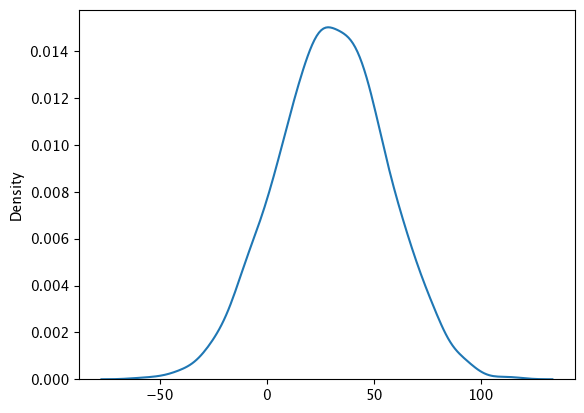

In [7]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(seed=123)
y1 = rng.normal(loc=50, scale=20, size=2000)
y2 = rng.normal(loc=20, scale=15, size=2000)
y = y1 - y2
sns.kdeplot(y)

(4) {numpy.random.default_rng}クラスに含まれる確率分布の中で、この章で紹介されていない分布を任意に一つ選び、検索エンジンで検索してみよ、またその分布から乱数を発生させる方法を確認せよ。

<Axes: ylabel='Density'>

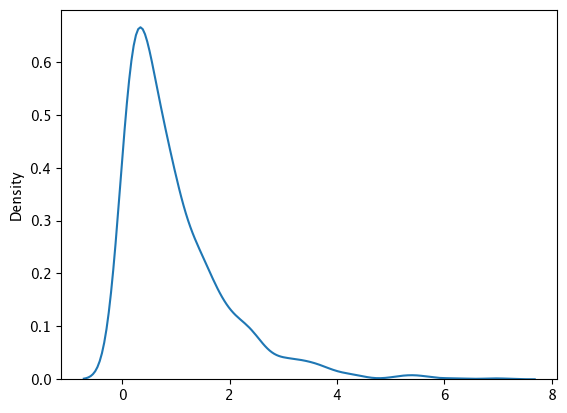

In [2]:
import numpy as np
import seaborn as sns

# ワイブル分布を生成
rng = np.random.default_rng(123)
weibull_rng = rng.weibull(1.0, 1000)
sns.kdeplot(weibull_rng)